# Library

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cv2

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar_image_processing import image_processing
%reload_ext autoreload

# Representations

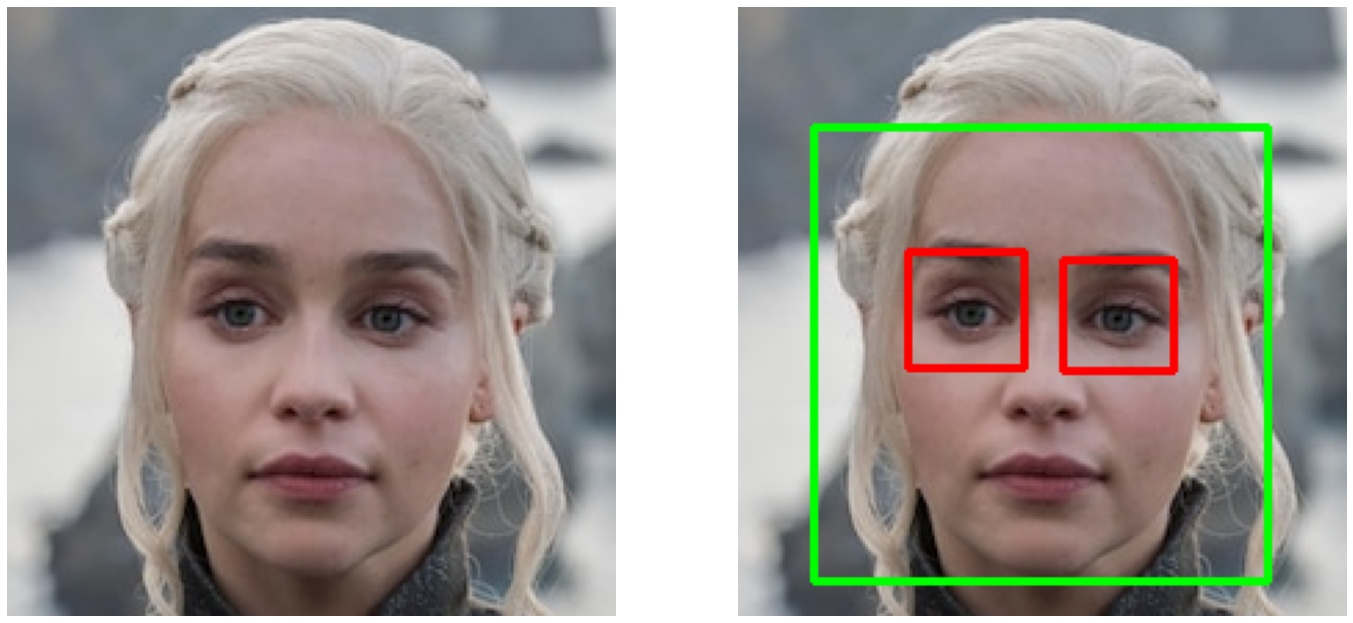

In [3]:
coor1 = image_processing.face_detection(image_data=r'E:\gitlab\dataset\images\got-05.png'
               ,edge=0,version=1)

In [4]:
coor1

[[43, 207, 27, 191]]

In [20]:
result = image_processing.face_alignment(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                coor=coor1)

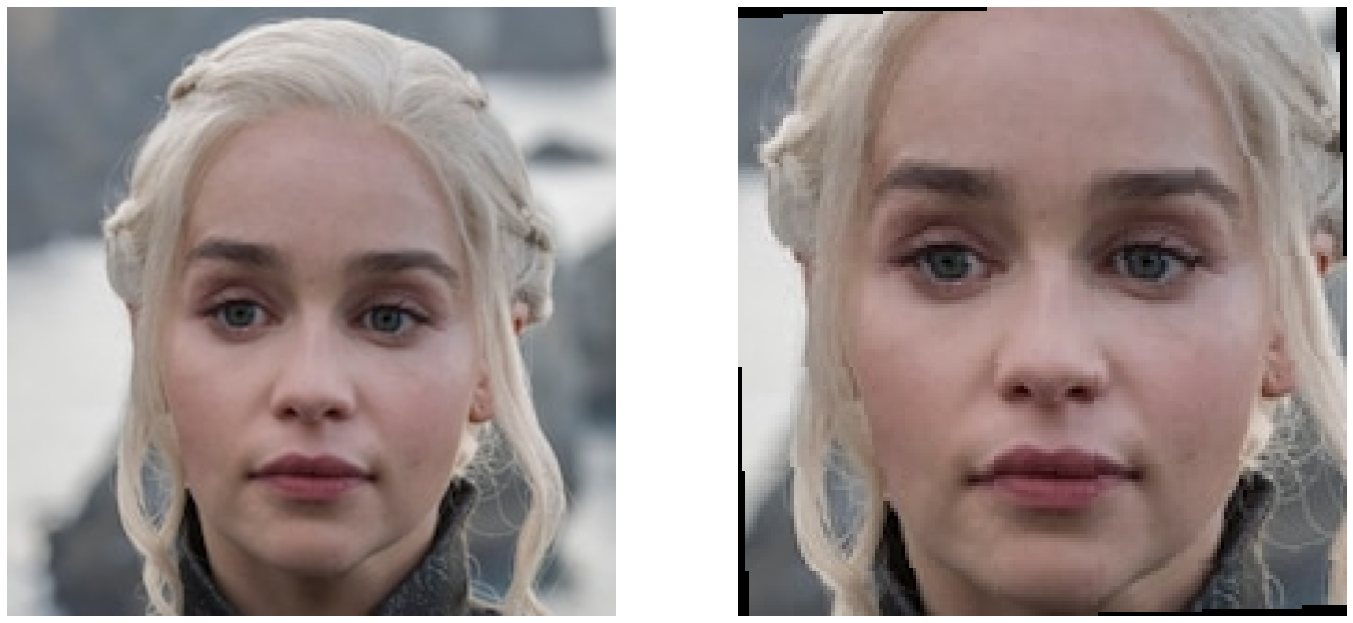

In [21]:
image_data=r'E:\gitlab\dataset\images\got-05.png'
n = len(result)+1
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(24,24))
for i in range(n):
    axes[i].axis('off')
axes[0].imshow(cv2.imread(image_data)[:,:,::-1],cmap='gray')
axes[1].imshow(result[0][:,:,::-1])
plt.show()

## VVG

## with preprocessing from keras

In [17]:
result_1 = image_processing.model_face_detector(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                                load_image=True,model_name='vgg'
                                                ,target_size=224)

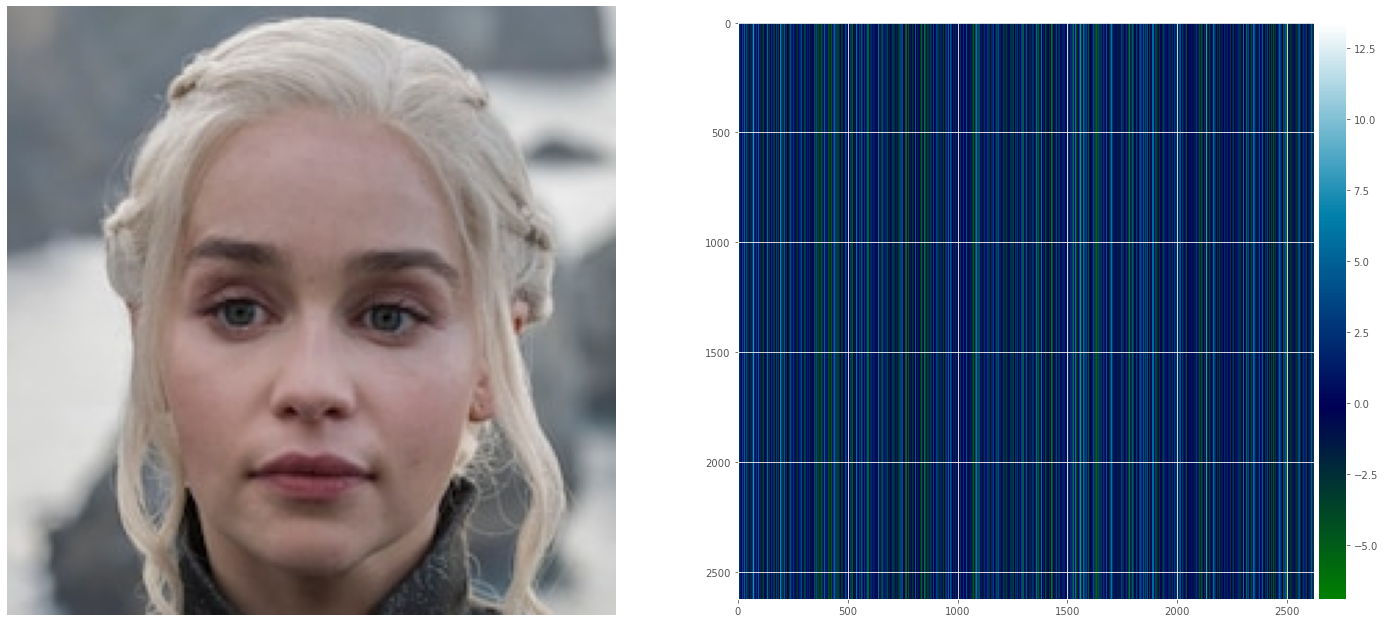

In [18]:
image_processing.model_face_detector_result(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                            result=result_1)

## with custome preprocessing

In [22]:
img_1 = image_processing.crop_square(result[0], 224,version=1)

In [26]:
result_2 = image_processing.model_face_detector(image_data=img_1,load_image=False,model_name='vgg',target_size=224)

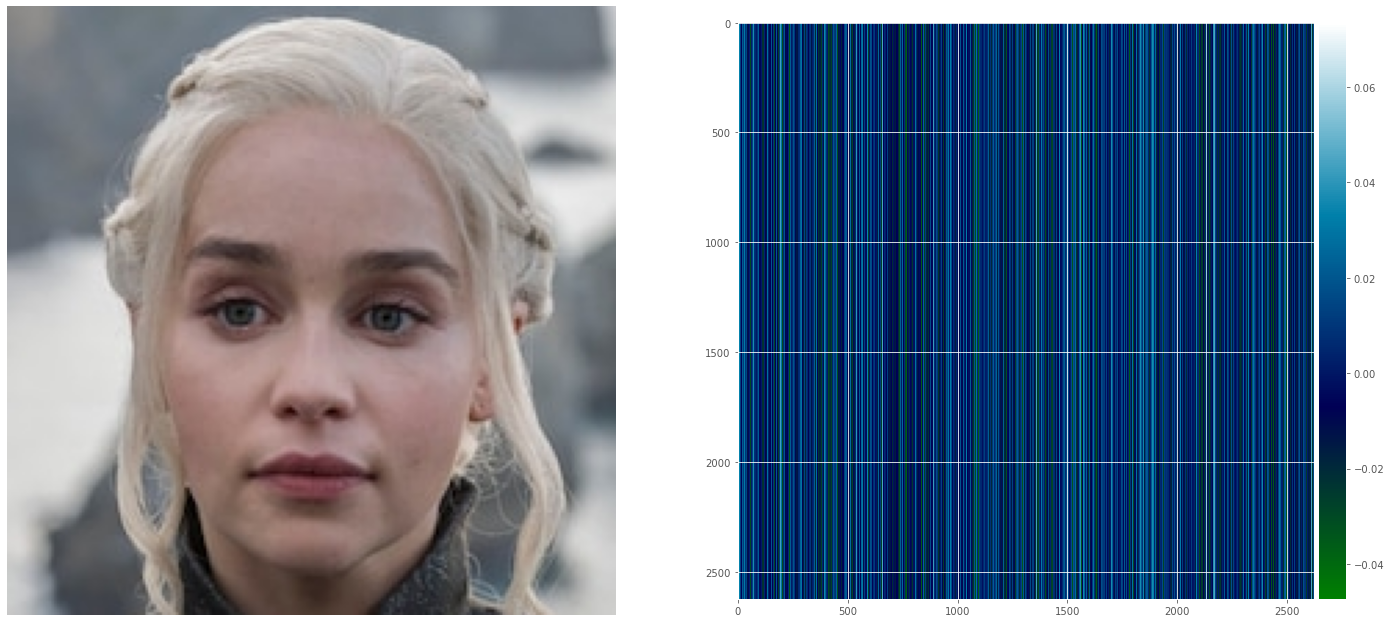

In [27]:
image_processing.model_face_detector_result(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                            result=result_2)

## measure the similiarity between 2 preprocessing

In [25]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [30]:
cosine_similarity = findCosineSimilarity(result_1, result_2)
cosine_similarity

5.960464477539063e-08

equal to 0 or same face or person

## Openface

In [29]:
img_1 = image_processing.crop_square(result[0], 96,version=1)

In [30]:
result_1 = image_processing.model_face_detector(image_data=img_1,
                                                load_image=False,model_name='openface',
                                                target_size=96)

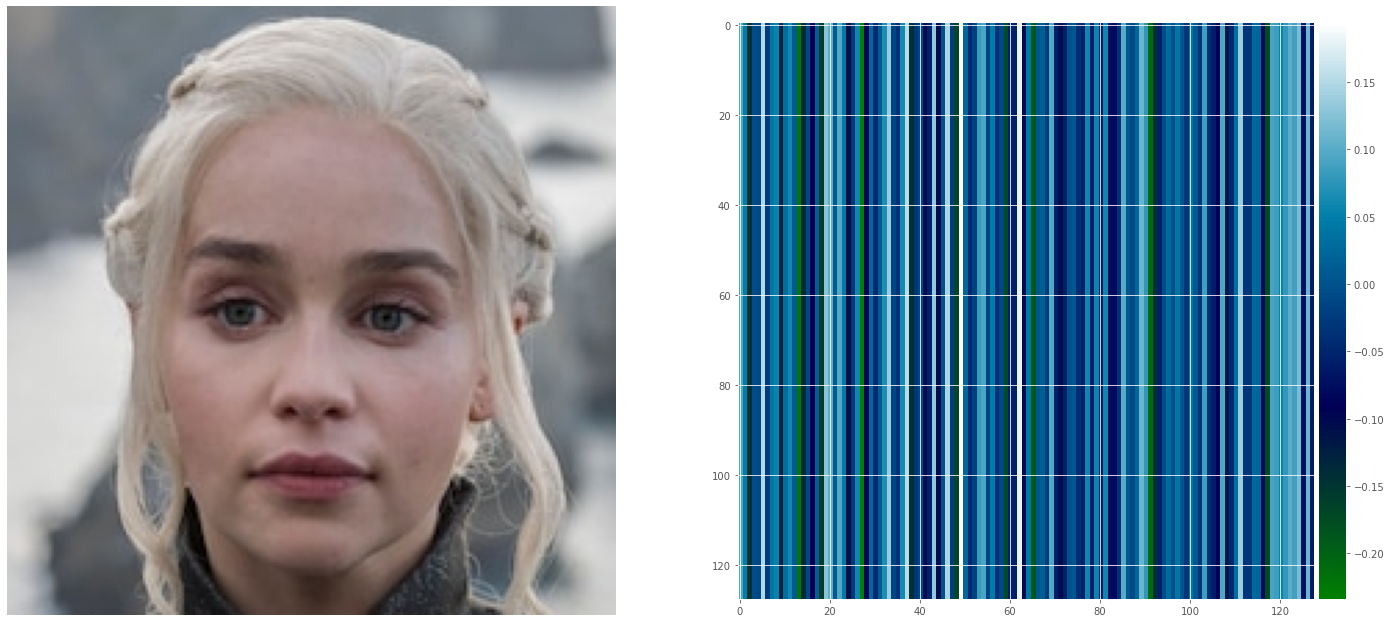

In [31]:
image_processing.model_face_detector_result(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                            result=result_1)

## Facenet

In [32]:
img_1 = image_processing.crop_square(result[0], 160,version=1)

In [33]:
result_1 = image_processing.model_face_detector(image_data=img_1,
                                                load_image=False,
                                                model_name='facenet',
                                                target_size=128)

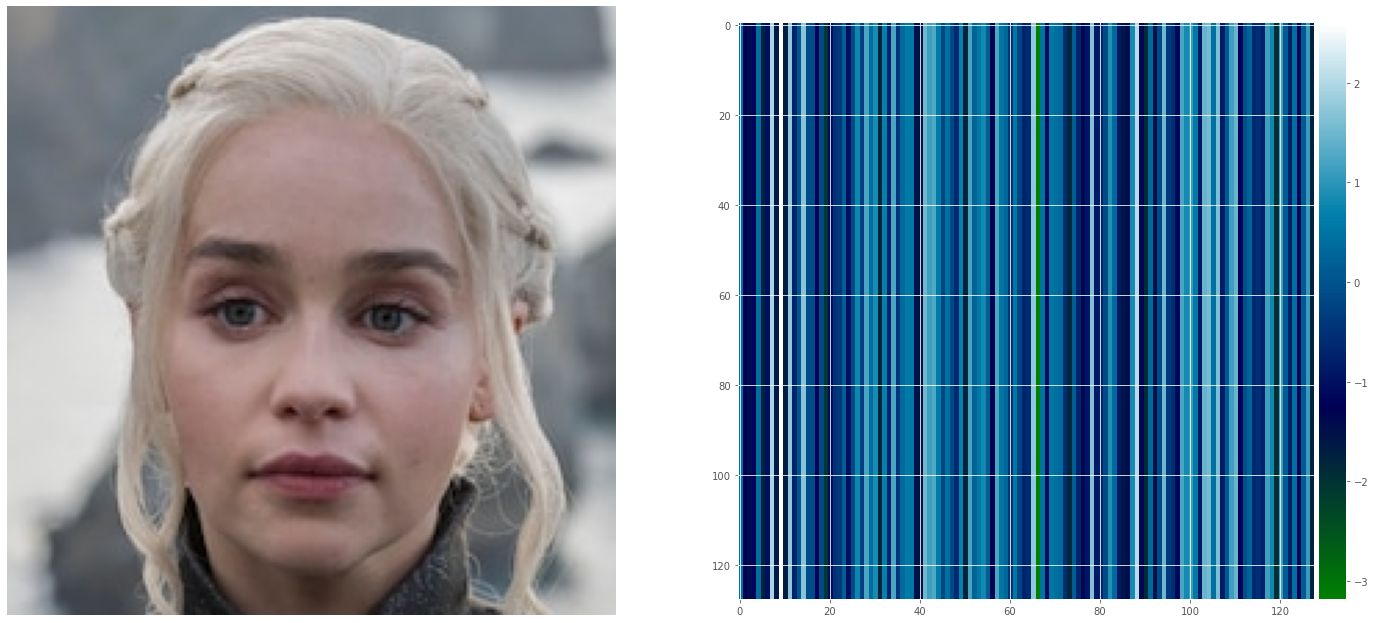

In [34]:
image_processing.model_face_detector_result(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                            result=result_1)

## Facenet 512

In [35]:
img_1 = image_processing.crop_square(result[0], 160,version=1)

In [36]:
result_1 = image_processing.model_face_detector(image_data=img_1,
                                                load_image=False,
                                                model_name='facenet_512',
                                                target_size=128)

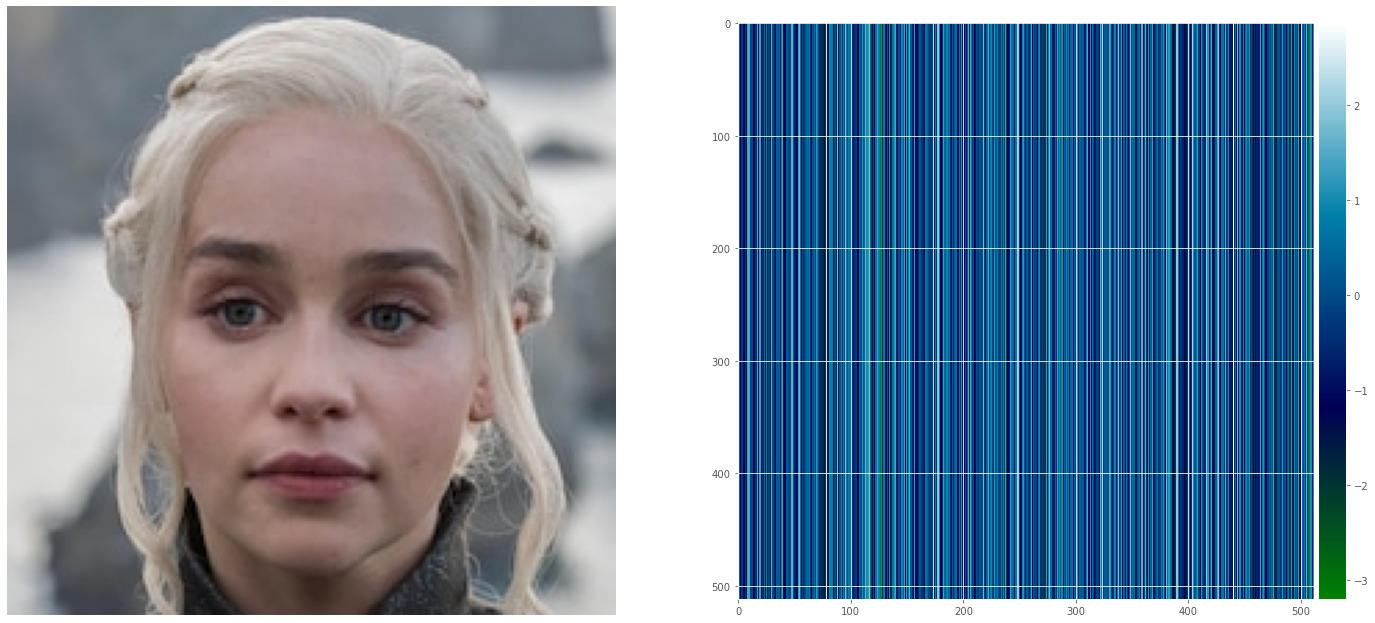

In [37]:
image_processing.model_face_detector_result(image_data=r'E:\gitlab\dataset\images\got-05.png',
                                            result=result_1)